#  XYZ Corp. : Default Rate Prediction and Analysis

As per the problem statement, the steps as follows :

- Exploratory Data Analysis (EDA)
  - Data Cleaning
  - Variable Transformations

- Feature engineering and Variable Selection
- Model Building and Validation
    - Preprocessing
    - Model Building, testing and validation
    - Model selection
- Final results

In [1]:
# imoport required package 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# read the dataset 

xyz_corp = pd.read_csv("E:\DSP 17\pratice paper\XYZCorp_LendingData.txt",sep = '\t',parse_dates=['issue_d'], low_memory = False)

In [3]:
# display the top 5 row of the dataset

xyz_corp.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
xyz_corp.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
855964,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0
855968,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN,0


# EDA

In [5]:
xyz_corp.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [6]:
# check the shape or demension of the data.

xyz_corp.shape #(rows, columns)

(855969, 73)

In [7]:
# display the information of the data.

xyz_corp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null datetime64[ns]
pymnt_plan   

In [8]:
xyz_corp.dtypes

id                    int64
member_id             int64
loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
                     ...   
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
default_ind           int64
Length: 73, dtype: object

In [9]:
xyz_corp.default_ind.dtypes

dtype('int64')

In [10]:
xyz_corp.issue_d.dtypes

dtype('<M8[ns]')

## Dependent Variable Analysis 

In [11]:
#check the dependent variable counts

xyz_corp['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

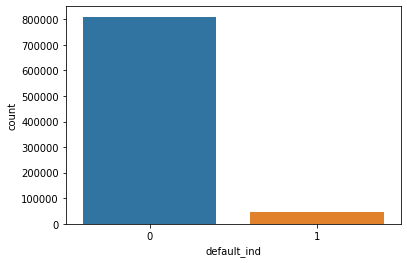

In [12]:
sns.countplot(xyz_corp['default_ind'])

Thus, we can conclude it is an Imbalanced Data.

### Null Values 

In [13]:
# check the null values is present or not/ true or flase

xyz_corp.isnull().sum().any()

True

In [14]:
#check the how many variables or columns are present in null values

xyz_corp.isnull().any().sum()

32

In [15]:
#To Display the null values counts and columns names

xyz_corp.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

Next up, we want to get rid of sparsely populated variables, so we remove columns with more that 70% missing values

In [16]:
#Display percentage of null values in each column
miss = xyz_corp.isnull().sum() / len(xyz_corp) * 100
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

title                           0.003855
last_credit_pull_d              0.005841
collections_12_mths_ex_med      0.006542
revol_util                      0.052105
last_pymnt_d                    1.035318
emp_length                      5.030673
emp_title                       5.776261
total_rev_hi_lim                7.863953
tot_cur_bal                     7.863953
tot_coll_amt                    7.863953
next_pymnt_d                   29.553757
mths_since_last_delinq         51.381767
mths_since_last_major_derog    75.099682
mths_since_last_record         84.674211
desc                           85.769111
inq_fi                         98.447607
all_util                       98.447607
max_bal_bc                     98.447607
open_rv_24m                    98.447607
open_rv_12m                    98.447607
total_bal_il                   98.447607
open_il_24m                    98.447607
open_il_12m                    98.447607
open_il_6m                     98.447607
open_acc_6m     

1)mths_since_last_major_derog, 
2)mths_since_last_record,
3)desc,
4)inq_fi,
5)all_util,
6)max_bal_bc,7)open_rv_24m,8)open_rv_12m,9)total_bal_il,
10)open_il_24m,11)open_il_12m,12)open_il_6m,13)open_acc_6m,14)total_cu_tl,15)inq_last_12m,
16)mths_since_rcnt_il,17)il_util,18)verification_status_joint,19)annual_inc_joint,20)dti_joint

In [17]:
#Removing features having more than 700000 missing values 

lis=xyz_corp.isnull().sum()
for i in range(len(lis)):
    if lis[i]>700000:
        del xyz_corp[(lis.index[i])]

In [18]:
xyz_corp.shape

(855969, 54)

* We have 19 variables which we can remove from modelling and analysis
* We should also remove those observations where all values are NAs or nulls

In [19]:
null = xyz_corp.isnull().sum()
null

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq         439812
open_acc    

Text(0.5, 1.0, 'List of columns after removing columns above 700000 NAs')

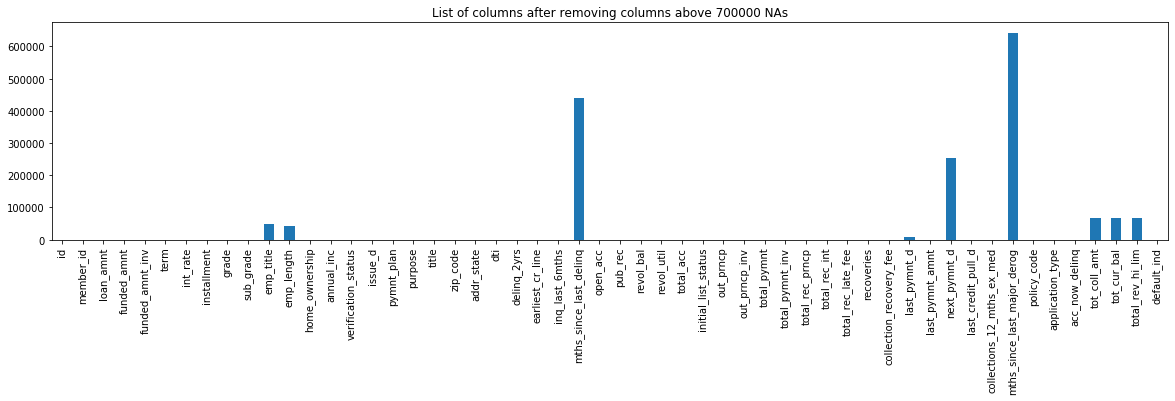

In [20]:


fig=plt.figure(figsize=(20,4))
null.plot(kind='bar')
plt.title('List of columns after removing columns above 700000 NAs')

## Coorelation with Dependent Variable( default_ind )

In [21]:
#Using Pearson Correlation
plt.figure(figsize=(20,18))
cor = xyz_corp.corr()
cor_target = (cor["default_ind"])

cor_target

id                            -0.219832
member_id                     -0.220181
loan_amnt                     -0.004907
funded_amnt                   -0.005797
funded_amnt_inv               -0.008209
int_rate                       0.155037
installment                    0.004753
annual_inc                    -0.037066
dti                            0.004429
delinq_2yrs                   -0.009186
inq_last_6mths                 0.074407
mths_since_last_delinq         0.001317
open_acc                      -0.021698
pub_rec                       -0.019607
revol_bal                     -0.020696
revol_util                     0.044497
total_acc                     -0.021087
out_prncp                     -0.225960
out_prncp_inv                 -0.225959
total_pymnt                   -0.039220
total_pymnt_inv               -0.040232
total_rec_prncp               -0.090336
total_rec_int                  0.046050
total_rec_late_fee             0.140760
recoveries                     0.475738


<Figure size 1440x1296 with 0 Axes>

### Romoving columns with Low Coorelation  

In [22]:
# The thersholud value of the coorelation is 0.02

lis2=[]
for i in range(len(cor_target)):
    if cor_target[i]<0.02 and cor_target[i]>(-0.02):
        lis2.append(cor_target.index[i])

In [23]:

for i in range(len(lis2)):
    xyz_corp.drop(lis2[i],axis=1, inplace = True)

In [24]:
xyz_corp.shape

(855969, 42)

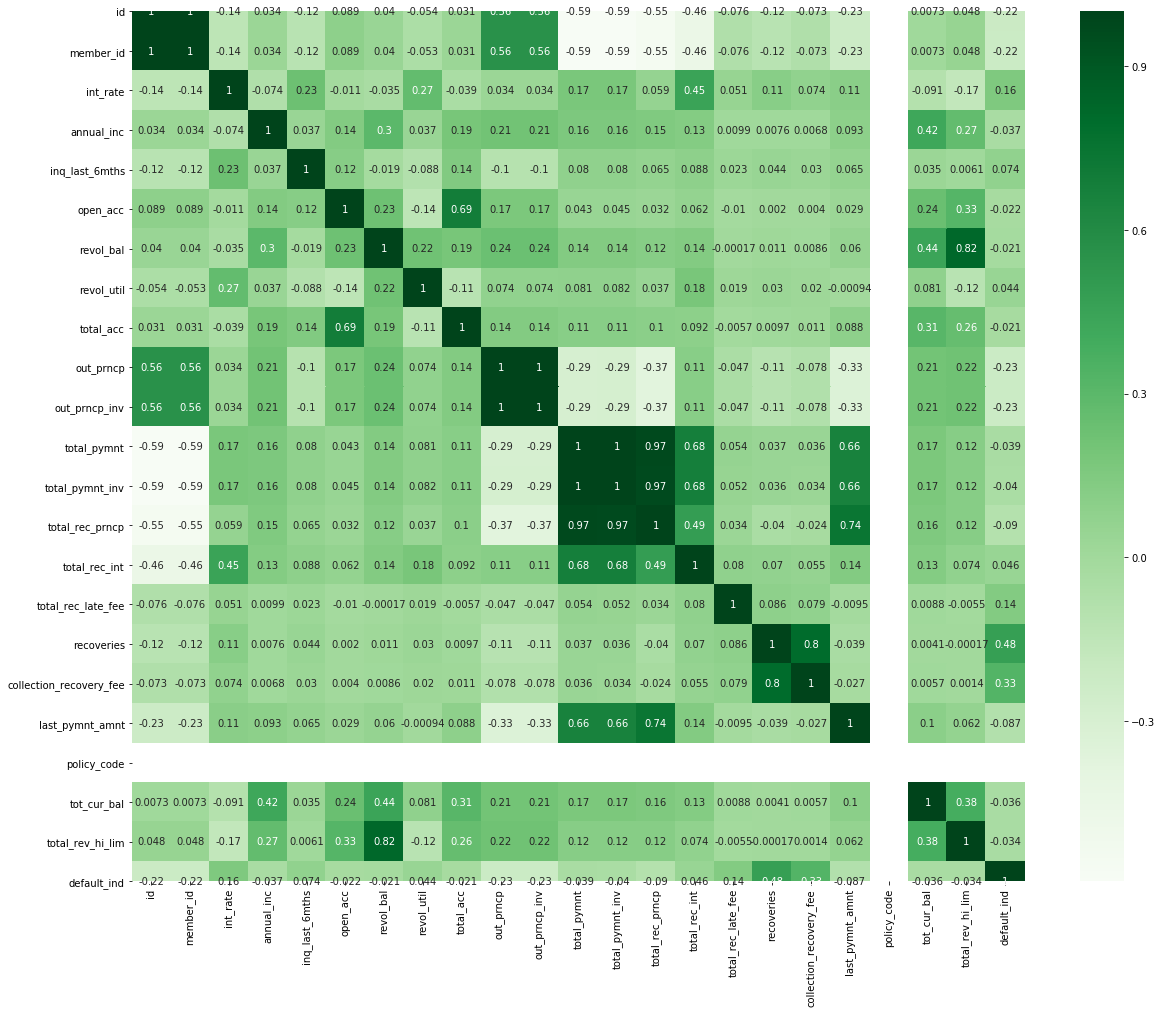

In [25]:
#Heat Map

plt.figure(figsize=(20,16))
cor = xyz_corp.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

### Term

In [26]:
xyz_corp['term'].value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

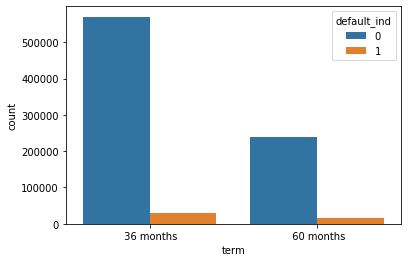

In [27]:
sns.countplot('term',data=xyz_corp,hue='default_ind')

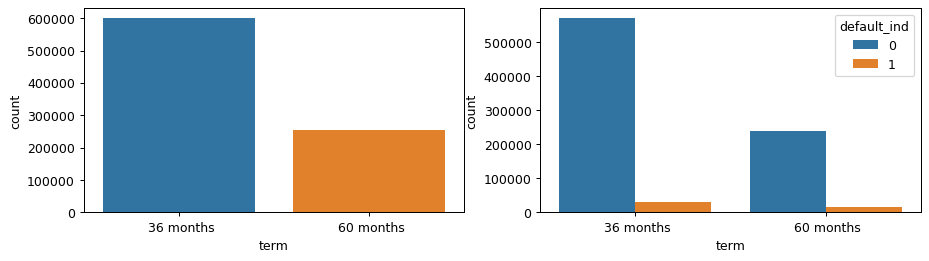

In [28]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.countplot(xyz_corp['term'],ax=ax1)
sns.countplot('term',hue='default_ind',data=xyz_corp,ax=ax2)

In [29]:
xyz_corp['term'] = np.where(xyz_corp['term']==' 36 months', 0,xyz_corp['term'])
xyz_corp['term'] = np.where(xyz_corp['term']==' 60 months', 1,xyz_corp['term'])

In [30]:
xyz_corp['term'].value_counts()

0    600221
1    255748
Name: term, dtype: int64

In [31]:
xyz_corp['term']=xyz_corp['term'].astype(float)

### Grade 

In [32]:
xyz_corp['grade'].value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

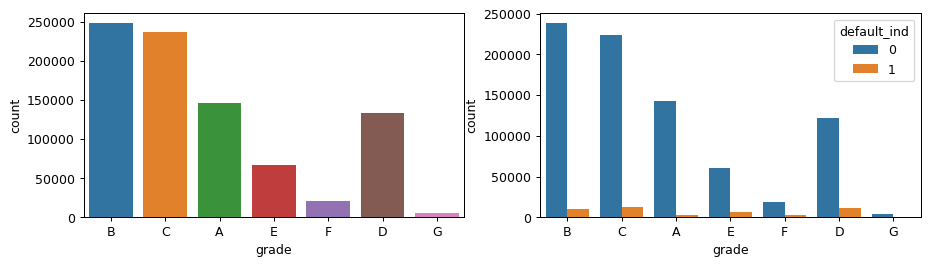

In [33]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.countplot(xyz_corp['grade'],ax=ax1)
sns.countplot('grade',hue='default_ind',data=xyz_corp,ax=ax2)

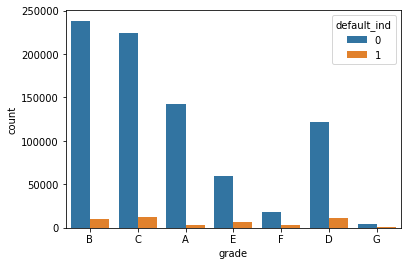

In [34]:
sns.countplot('grade',data=xyz_corp,hue='default_ind')


In [35]:
xyz_corp['grade'] = np.where(xyz_corp['grade'] == 'A', 0, xyz_corp['grade'])
xyz_corp['grade'] = np.where(xyz_corp['grade'] == 'B', 0, xyz_corp['grade'])
xyz_corp['grade'] = np.where(xyz_corp['grade'] == 'C', 0, xyz_corp['grade'])
xyz_corp['grade'] = np.where(xyz_corp['grade'] == 'D', 1, xyz_corp['grade'])
xyz_corp['grade'] = np.where(xyz_corp['grade'] == 'E', 1, xyz_corp['grade'])
xyz_corp['grade'] = np.where(xyz_corp['grade'] == 'F', 1, xyz_corp['grade'])
xyz_corp['grade'] = np.where(xyz_corp['grade'] == 'G', 1, xyz_corp['grade'])

In [36]:
xyz_corp['grade'].value_counts()

0    630518
1    225451
Name: grade, dtype: int64

In [37]:
xyz_corp['grade']=xyz_corp['grade'].astype(float)

### Home_Ownership 

In [38]:
xyz_corp['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [39]:
df=xyz_corp.groupby('home_ownership')
df['default_ind'].value_counts()

home_ownership  default_ind
ANY             0                   3
MORTGAGE        0              408730
                1               20376
NONE            0                  38
                1                   7
OTHER           0                 117
                1                  27
OWN             0               80001
                1                4135
RENT            0              320613
                1               21922
Name: default_ind, dtype: int64

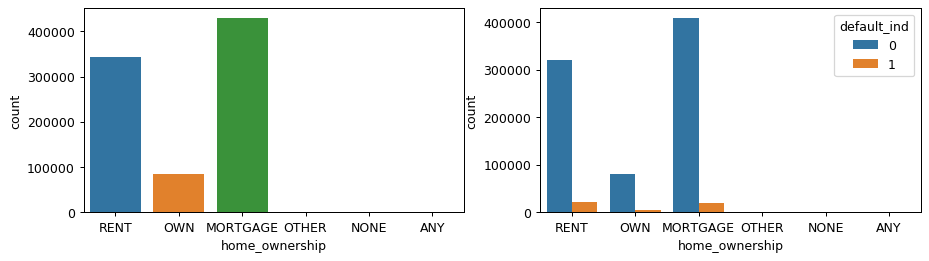

In [40]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.countplot(xyz_corp['home_ownership'],ax=ax1)
sns.countplot('home_ownership',hue='default_ind',data=xyz_corp,ax=ax2)

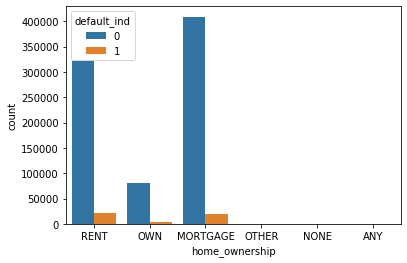

In [41]:
sns.countplot('home_ownership',data=xyz_corp,hue='default_ind')

In [42]:
xyz_corp['home_ownership'] = np.where(xyz_corp['home_ownership']=='RENT', 1, xyz_corp['home_ownership'])
xyz_corp['home_ownership'] = np.where(xyz_corp['home_ownership']=='OWN', 1, xyz_corp['home_ownership'])
xyz_corp['home_ownership'] = np.where(xyz_corp['home_ownership']=='MORTGAGE', 1, xyz_corp['home_ownership'])
xyz_corp['home_ownership'] = np.where(xyz_corp['home_ownership']=='NONE', 2, xyz_corp['home_ownership'])
xyz_corp['home_ownership'] = np.where(xyz_corp['home_ownership']=='OTHER', 2, xyz_corp['home_ownership'])
xyz_corp['home_ownership'] = np.where(xyz_corp['home_ownership']=='ANY', 0, xyz_corp['home_ownership'])

In [43]:
xyz_corp['home_ownership'].value_counts()

1    855777
2       189
0         3
Name: home_ownership, dtype: int64

In [44]:
df=pd.get_dummies(xyz_corp['home_ownership'],drop_first=True)
xyz_corp=pd.concat([df, xyz_corp],axis=1)

# Dummy Variables

In [45]:
xyz_corp.drop(['home_ownership'],axis = 1, inplace = True )

### Verification_Status

In [46]:
#data['verification_status'].value_counts()

df=xyz_corp.groupby('verification_status')
df['default_ind'].value_counts()

verification_status  default_ind
Not Verified         0              245256
                     1               12486
Source Verified      0              303976
                     1               14202
Verified             0              260270
                     1               19779
Name: default_ind, dtype: int64

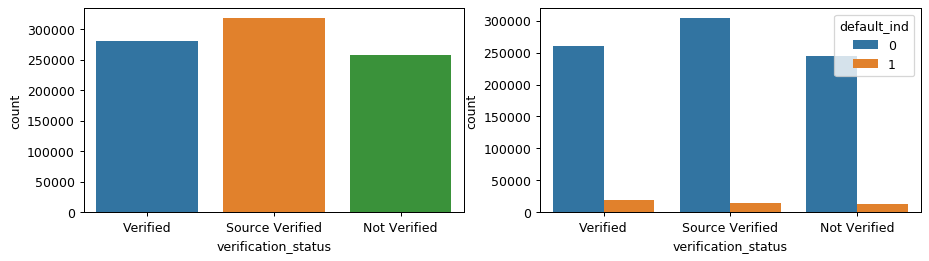

In [47]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3),dpi=90)
sns.countplot(xyz_corp['verification_status'],ax=ax1)
sns.countplot('verification_status',hue='default_ind',data=xyz_corp,ax=ax2)

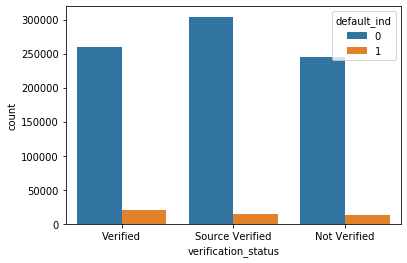

In [48]:
sns.countplot('verification_status',data=xyz_corp,hue='default_ind')

In [49]:
df=pd.get_dummies(xyz_corp['verification_status'],drop_first=True)
xyz_corp=pd.concat([df,xyz_corp],axis=1)

# Dummy Variables

In [50]:
xyz_corp.drop(['verification_status'],axis=1, inplace = True)

### Payment_Plan

In [51]:
xyz_corp['pymnt_plan'].value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

In [52]:
xyz_corp.drop(['pymnt_plan'],axis=1, inplace = True)
# del data['pymnt_plan']

### Initial_list_status  

In [53]:
xyz_corp['initial_list_status'].value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

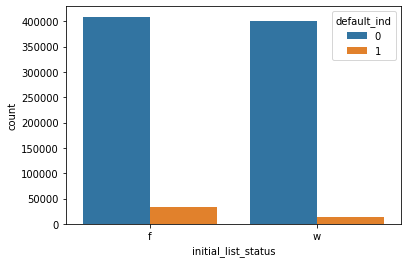

In [54]:
sns.countplot('initial_list_status',data=xyz_corp,hue='default_ind')

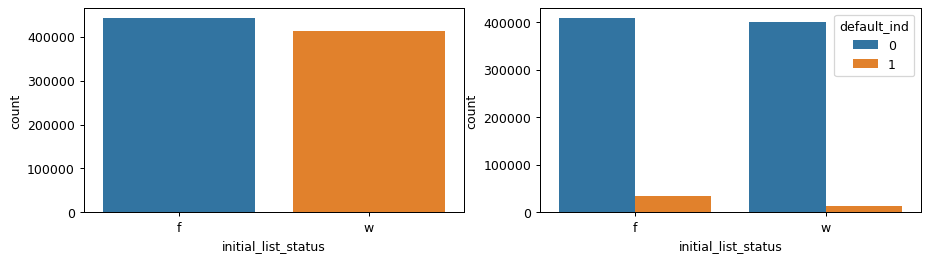

In [55]:
f, (ax1,ax2,) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,3),dpi = 90)
sns.countplot(xyz_corp['initial_list_status'], ax= ax1)
sns.countplot('initial_list_status', hue = 'default_ind', data = xyz_corp, ax = ax2)

In [56]:
xyz_corp['initial_list_status'] = np.where(xyz_corp['initial_list_status']=='f', 0, xyz_corp['initial_list_status'])
xyz_corp['initial_list_status'] = np.where(xyz_corp['initial_list_status']=='w', 1, xyz_corp['initial_list_status'])

In [57]:
xyz_corp['initial_list_status'].value_counts()

0    442555
1    413414
Name: initial_list_status, dtype: int64

In [58]:
xyz_corp['initial_list_status']=xyz_corp['initial_list_status'].astype(float)

### Application_Type 

In [59]:
xyz_corp['application_type'].value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

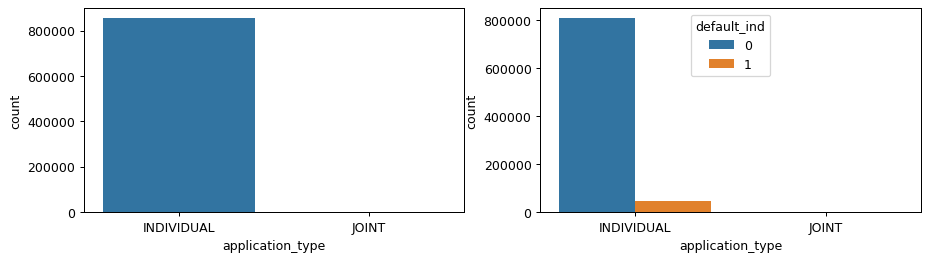

In [60]:
f, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,3), dpi = 90)
sns.countplot(xyz_corp['application_type'], ax = ax1)
sns.countplot('application_type', hue = 'default_ind', data = xyz_corp, ax =ax2)

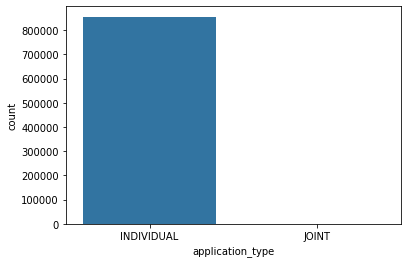

In [61]:
sns.countplot('application_type',data=xyz_corp)

In [62]:
df=xyz_corp.groupby('application_type')
df['default_ind'].value_counts()

application_type  default_ind
INDIVIDUAL        0              809060
                  1               46467
JOINT             0                 442
Name: default_ind, dtype: int64

In [63]:
xyz_corp['application_type'] = np.where(xyz_corp['application_type']=='INDIVIDUAL', 0, xyz_corp['application_type'])
xyz_corp['application_type'] = np.where(xyz_corp['application_type']=='JOINT', 1, xyz_corp['application_type'])

In [64]:
xyz_corp['application_type'].value_counts()

0    855527
1       442
Name: application_type, dtype: int64

In [65]:
xyz_corp['application_type']=xyz_corp['application_type'].astype(float)
# Object to Float type

In [66]:
xyz_corp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 43 columns):
Source Verified            855969 non-null uint8
Verified                   855969 non-null uint8
1                          855969 non-null uint8
2                          855969 non-null uint8
id                         855969 non-null int64
member_id                  855969 non-null int64
term                       855969 non-null float64
int_rate                   855969 non-null float64
grade                      855969 non-null float64
sub_grade                  855969 non-null object
emp_title                  806526 non-null object
emp_length                 812908 non-null object
annual_inc                 855969 non-null float64
issue_d                    855969 non-null datetime64[ns]
purpose                    855969 non-null object
title                      855936 non-null object
zip_code                   855969 non-null object
addr_state                 855969

### Last Credit Full Details

In [67]:
xyz_corp['last_credit_pull_d'].value_counts()

Jan-2016    701687
Dec-2015     19039
Nov-2015     11388
Oct-2015     10290
Sep-2015      9985
             ...  
Jun-2008         1
May-2008         1
May-2007         1
Jul-2008         1
Jul-2007         1
Name: last_credit_pull_d, Length: 102, dtype: int64

In [68]:
xyz_corp.groupby('last_credit_pull_d')['default_ind'].value_counts()

last_credit_pull_d  default_ind
Apr-2009            0                16
Apr-2010            0                46
                    1                15
Apr-2011            0               119
                    1                23
                                   ... 
Sep-2013            1               251
Sep-2014            0              2312
                    1               622
Sep-2015            0              8910
                    1              1075
Name: default_ind, Length: 181, dtype: int64

In [69]:
xyz_corp['last_credit_pull_d'] = pd.to_datetime(xyz_corp['last_credit_pull_d'])
xyz_corp['Month'] = xyz_corp['last_credit_pull_d'].apply(lambda x: x.month)
xyz_corp['Year'] = xyz_corp['last_credit_pull_d'].apply(lambda x: x.year)
xyz_corp = xyz_corp.drop(['last_credit_pull_d'], axis = 1)

In [70]:
# drop unnecessary variables

xyz_corp.drop(['id','member_id','tot_cur_bal','total_rev_hi_lim','policy_code'], axis = 1,inplace=True)

In [71]:
xyz_corp.isnull().sum()

Source Verified                 0
Verified                        0
1                               0
2                               0
term                            0
int_rate                        0
grade                           0
sub_grade                       0
emp_title                   49443
emp_length                  43061
annual_inc                      0
issue_d                         0
purpose                         0
title                          33
zip_code                        0
addr_state                      0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
revol_bal                       0
revol_util                    446
total_acc                       0
initial_list_status             0
out_prncp                       0
out_prncp_inv                   0
total_pymnt                     0
total_pymnt_inv                 0
total_rec_prncp                 0
total_rec_int                   0
total_rec_late

In [72]:
xyz_corp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 39 columns):
Source Verified            855969 non-null uint8
Verified                   855969 non-null uint8
1                          855969 non-null uint8
2                          855969 non-null uint8
term                       855969 non-null float64
int_rate                   855969 non-null float64
grade                      855969 non-null float64
sub_grade                  855969 non-null object
emp_title                  806526 non-null object
emp_length                 812908 non-null object
annual_inc                 855969 non-null float64
issue_d                    855969 non-null datetime64[ns]
purpose                    855969 non-null object
title                      855936 non-null object
zip_code                   855969 non-null object
addr_state                 855969 non-null object
earliest_cr_line           855969 non-null object
inq_last_6mths             8559

In [73]:
# Drop object data type of varibles 


xyz_corp.drop(['sub_grade','emp_title',
            'emp_length',
            'purpose','title','application_type',
            'zip_code','addr_state',
            'earliest_cr_line','last_pymnt_d',
            'next_pymnt_d'],axis = 1, inplace = True)

In [74]:
xyz_corp.isnull().sum()

Source Verified              0
Verified                     0
1                            0
2                            0
term                         0
int_rate                     0
grade                        0
annual_inc                   0
issue_d                      0
inq_last_6mths               0
open_acc                     0
revol_bal                    0
revol_util                 446
total_acc                    0
initial_list_status          0
out_prncp                    0
out_prncp_inv                0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_rec_int                0
total_rec_late_fee           0
recoveries                   0
collection_recovery_fee      0
last_pymnt_amnt              0
default_ind                  0
Month                       50
Year                        50
dtype: int64

In [75]:
xyz_corp['revol_util'].fillna(xyz_corp['revol_util'].mean(),inplace=True)
xyz_corp['Month'].fillna(xyz_corp.mode()['Month'][0],inplace=True)
xyz_corp['Year'].fillna(xyz_corp.mode()['Year'][0],inplace=True)

In [76]:
xyz_corp.isnull().sum()

Source Verified            0
Verified                   0
1                          0
2                          0
term                       0
int_rate                   0
grade                      0
annual_inc                 0
issue_d                    0
inq_last_6mths             0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
default_ind                0
Month                      0
Year                       0
dtype: int64

In [77]:
xyz_corp.shape

(855969, 28)

In [78]:
xyz_corp.columns

Index([        'Source Verified',                'Verified',
                               1,                         2,
                          'term',                'int_rate',
                         'grade',              'annual_inc',
                       'issue_d',          'inq_last_6mths',
                      'open_acc',               'revol_bal',
                    'revol_util',               'total_acc',
           'initial_list_status',               'out_prncp',
                 'out_prncp_inv',             'total_pymnt',
               'total_pymnt_inv',         'total_rec_prncp',
                 'total_rec_int',      'total_rec_late_fee',
                    'recoveries', 'collection_recovery_fee',
               'last_pymnt_amnt',             'default_ind',
                         'Month',                    'Year'],
      dtype='object')

In [79]:
##Splitting our data into train and test on the basis of 
##train set is spplitted from june 2007 to may 2015
##test set is splitted from june 2015 to december 2015


train = xyz_corp[xyz_corp['issue_d'] < '2015-6-01']
test = xyz_corp[xyz_corp['issue_d'] >= '2015-6-01']

In [80]:
train.shape

(598978, 28)

In [81]:
test.shape

(256991, 28)

In [82]:
xyz_corp.drop('issue_d', axis = 1, inplace = True)

### Split the data

In [83]:
X = xyz_corp.drop('default_ind', axis = 1)
y = xyz_corp.default_ind

In [84]:
 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

## Logistic Regression

In [85]:


lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
lr_pred = lr.predict(X_test)

In [87]:

lr_pred_prob=lr.predict_proba(X_test)

## Confusion Matrix

In [88]:
cm = confusion_matrix(y_test, lr_pred)
print(cm)

[[242680    193]
 [  3728  10190]]


In [89]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    242873
           1       0.98      0.73      0.84     13918

    accuracy                           0.98    256791
   macro avg       0.98      0.87      0.92    256791
weighted avg       0.98      0.98      0.98    256791



In [90]:
##Calculating important metrics Precision score,Recall score,F1_Score


print("accuracy_score is  :", accuracy_score(y_test, lr_pred))
print("precision score is :",precision_score(y_test,lr_pred))
print("recall is          :",recall_score(y_test,lr_pred))
print("F1_score is        :",f1_score(y_test,lr_pred))

accuracy_score is  : 0.9847307732747643
precision score is : 0.9814119233362226
recall is          : 0.7321454231929875
F1_score is        : 0.8386486152833217


### Cross Validation Score

In [91]:

lr_cvs=cross_val_score(estimator=lr,X=X_train,y=y_train,cv=10)
lr_cvs

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

array([0.98521312, 0.98481258, 0.98482927, 0.98372776, 0.98462899,
       0.9850963 , 0.98379452, 0.98436196, 0.98474582, 0.98522932])

In [92]:
lr_cvs.mean()

0.9846439641821192

## ROC curve

In [93]:
#Receiver Operating Characteristics Area Under Curve(AUC) score 

print(roc_auc_score(y_test,lr_pred))

0.865675384598433


In [94]:

fpr,tpr,thresholds=roc_curve(y_test,lr_pred)

<function matplotlib.pyplot.show(*args, **kw)>

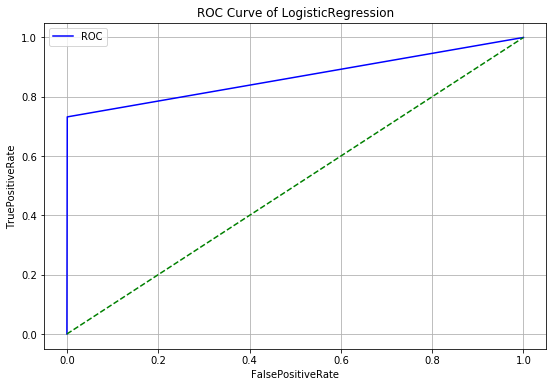

In [95]:
plt.figure(figsize=(9,6))
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.title('ROC Curve of LogisticRegression')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.grid(True)
plt.legend()
plt.show

## RondomForest Model

In [96]:

rf = RandomForestClassifier()              #n_estimators=200, min_samples_split=30, criterion='entropy'
rf.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
rf_pred = rf.predict(X_test)

## Confusion Matrix

In [98]:
rf_cm =confusion_matrix(y_test, rf_pred)
print(rf_cm)

[[242826     47]
 [   847  13071]]


In [99]:
rf_clf = classification_report(y_test, rf_pred)
print(rf_clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    242873
           1       1.00      0.94      0.97     13918

    accuracy                           1.00    256791
   macro avg       1.00      0.97      0.98    256791
weighted avg       1.00      1.00      1.00    256791



In [100]:
print("accuracy_score is  :",  accuracy_score(y_test, rf_pred))
print("precision score is :",precision_score(y_test,rf_pred))
print("recall is          :",recall_score(y_test,rf_pred))
print("F1_score is        :",f1_score(y_test,rf_pred))

accuracy_score is  : 0.9965185695760366
precision score is : 0.9964171367586523
recall is          : 0.9391435551084926
F1_score is        : 0.9669329782512206


## Cross Validation Score

In [101]:

rf_cvs=cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)
rf_cvs

array([0.9965119 , 0.99694583, 0.99637838, 0.9965119 , 0.99627825,
       0.99676224, 0.99622818, 0.99669548, 0.99644514, 0.99639495])

In [102]:
rf_cvs.mean()

0.996515225457969

## ROC Curve

In [103]:
#Receiver Operating Characteristics Area Under Curve(AUC) score 

print(roc_auc_score(y_test,rf_pred))

0.9694750191661174


In [104]:

fpr,tpr,thresholds=roc_curve(y_test,rf_pred)

<function matplotlib.pyplot.show(*args, **kw)>

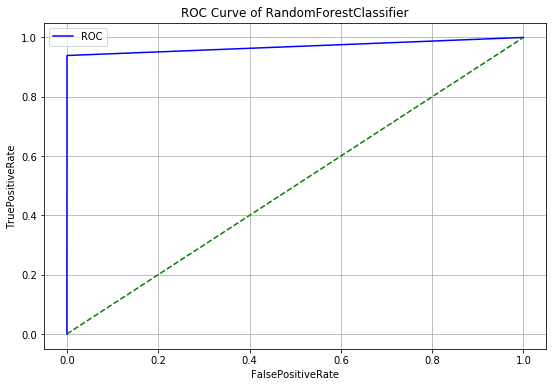

In [105]:
plt.figure(figsize=(9,6))
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.title('ROC Curve of RandomForestClassifier')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.grid(True)
plt.legend()
plt.show